<a href="https://colab.research.google.com/github/byslavam/MAT422/blob/main/1_4_Principle_Component_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.4 Principle Component Analysis**

Used for dimensionality reduction projecting each data point onto only the first few principal components to
obtain lower-dimensional data

## **Singular Value Decompistion**
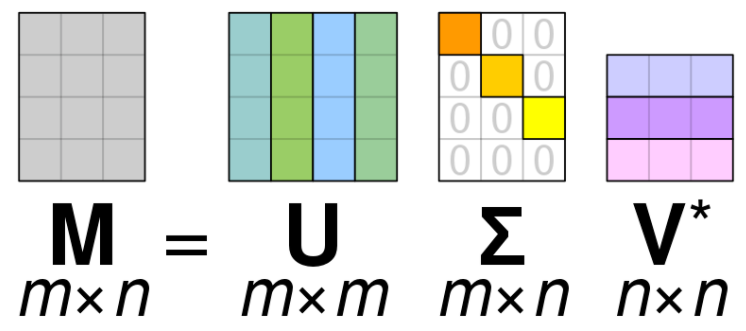

M: original matrix

U: left-singular matrix

Σ: diagonal matrix containing singular/eigenvalues

V: right-singular matrix

In [3]:
# numpy library can decompose matrix in order to reduce the dimension of the origial matrix.
import numpy as np

rows = 4
columns = 4

# Generate Random Matrix
A = np.random.rand(rows, columns)

# Perform Singular Value Decompisition
U, S, VT = np.linalg.svd(A)

# Reconstruct matrix and show every compenent of SVD
A_reconstructed = np.dot(U, np.dot(np.diag(S), VT))

print("Original Matrix A:")
print(A)
print("\nU (Left Singular Vectors):")
print(U)
print("\nS (Singular Values):")
print(S)
print("\nVT (Right Singular Vectors):")
print(VT)
print("\nReconstructed Matrix A:")
print(A_reconstructed)

Original Matrix A:
[[0.61364309 0.84211246 0.46473467 0.53952536]
 [0.91981458 0.75979137 0.80500886 0.27271069]
 [0.74216118 0.00940818 0.63070541 0.23856971]
 [0.41550741 0.95147724 0.37728247 0.27487473]]

U (Left Singular Vectors):
[[-0.52917145  0.28412301 -0.74698565 -0.28506865]
 [-0.62394086 -0.20331353  0.55836198 -0.50753651]
 [-0.35011183 -0.7674678  -0.22923209  0.48566195]
 [-0.4561766   0.53752293  0.2787418   0.65213114]]

S (Singular Values):
[2.32432528 0.75995908 0.24435592 0.01561537]

VT (Right Singular Vectors):
[[-0.57996034 -0.58383495 -0.49094983 -0.28592136]
 [-0.47226315  0.77505229 -0.41170045  0.08224482]
 [ 0.00367924  0.23839209  0.25750425 -0.93640122]
 [-0.66377706 -0.03999901  0.72329978  0.1861116 ]]

Reconstructed Matrix A:
[[0.61364309 0.84211246 0.46473467 0.53952536]
 [0.91981458 0.75979137 0.80500886 0.27271069]
 [0.74216118 0.00940818 0.63070541 0.23856971]
 [0.41550741 0.95147724 0.37728247 0.27487473]]


## **Low-Rank Matrix Approximations**
Involves representing a given matrix with a lower-rank matrix while minimizing the loss of information
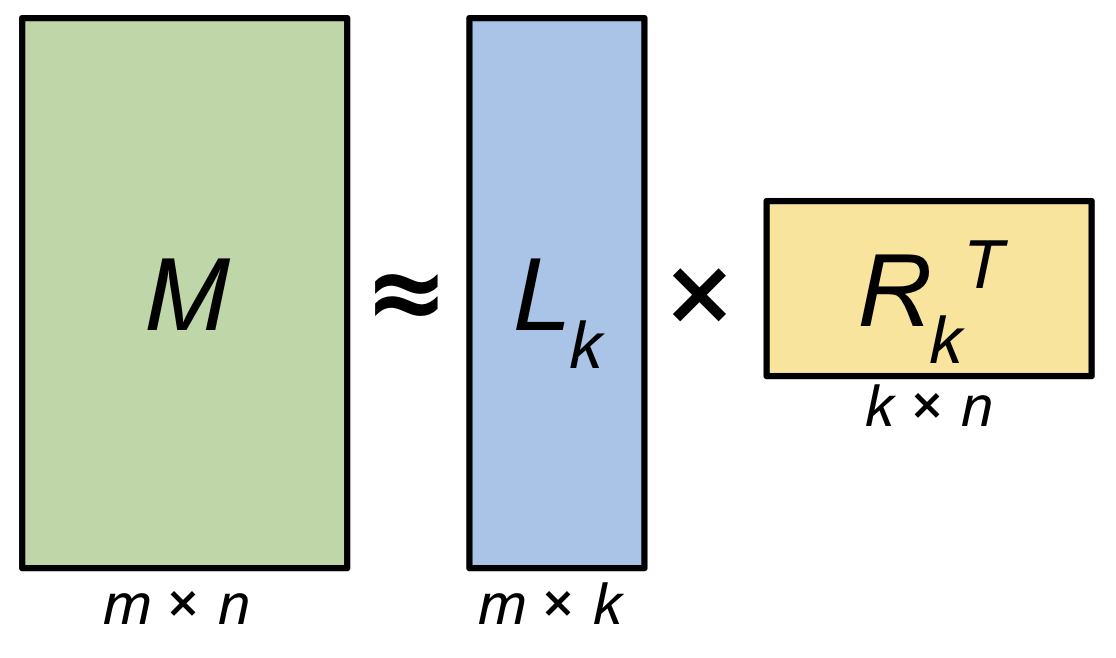

In [4]:
rows = 4
columns = 4

# Generate Random Matrix
A = np.random.rand(rows, columns)

# Perform SVD on matrix A
U, S, VT = np.linalg.svd(A)

# Rank of the approximation (number of singuar values kept from A)
k = 2

# Create the low-rank approximation of A using the first k singular values/vectors
A_approx = np.dot(U[:, :k], np.dot(np.diag(S[:k]), VT[:k, :]))

print("Original Matrix A:")
print(A)
print("\nLow-Rank Approximation A_approx (rank {}):".format(k))
print(A_approx)

Original Matrix A:
[[0.94693109 0.68540871 0.08733903 0.35327684]
 [0.04253409 0.80920458 0.85533553 0.65674062]
 [0.58924095 0.60088373 0.40226624 0.01082864]
 [0.33893623 0.24613476 0.7080953  0.16158998]]

Low-Rank Approximation A_approx (rank 2):
[[0.96662584 0.68013482 0.17437443 0.20059416]
 [0.10671883 0.71975174 0.97640873 0.5454976 ]
 [0.59200523 0.55426795 0.31127742 0.23465927]
 [0.20404839 0.4531492  0.49645141 0.29366574]]


## **Principle Component Analysis**
 Dimensionality reduction technique used for reducing the complexity of high-dimensional data while preserving important information. Done by transforming the original variables into a new set of uncorrelated variables called principal components.
 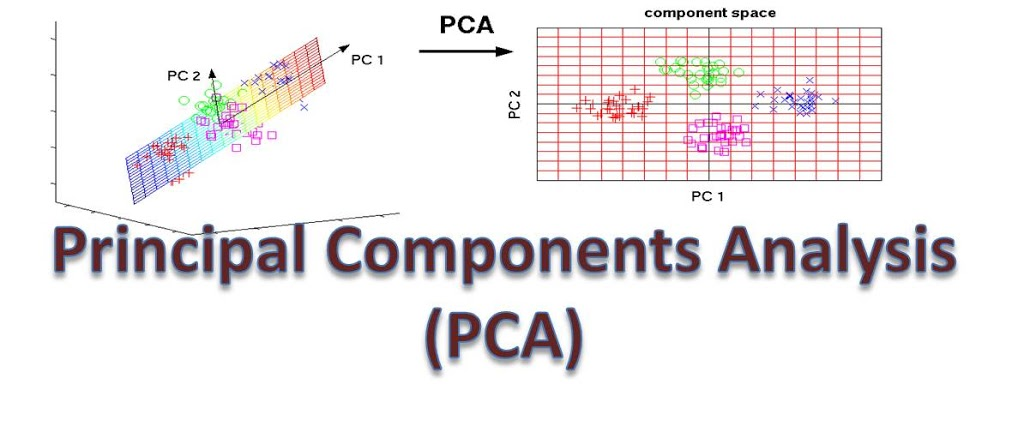


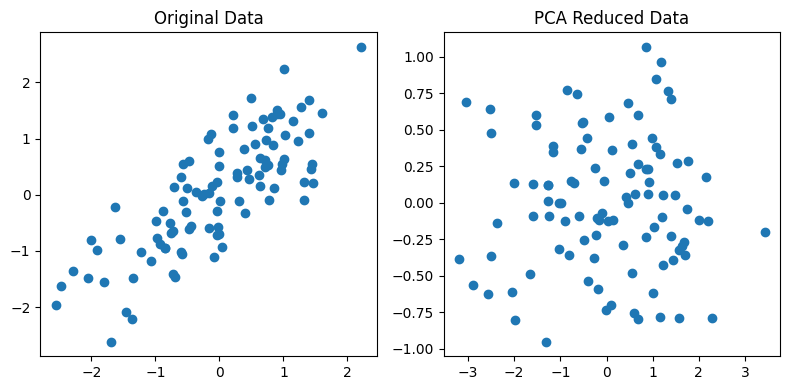

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

#PCA using scklearn library

# Rnadom Data
np.random.seed(0)
mean = [0, 0]
cov = [[1, 0.8], [0.8, 1]]
X = np.random.multivariate_normal(mean, cov, 100)

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Original data
plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1])
plt.title("Original Data")

# PCA-reduced data
plt.subplot(122)
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.title("PCA Reduced Data")

plt.tight_layout()
plt.show()
